<a href="https://colab.research.google.com/github/ekqlsrla/ESAA/blob/main/%EC%84%B8%EC%85%98/3%EC%9B%94_28%EC%9D%BC_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [37]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

### Step 4. See the first 10 entries

In [38]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [69]:
top_5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[0:5]

top_5 = pd.DataFrame(top_5)
top_5.reset_index(inplace = True)

top_5


,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


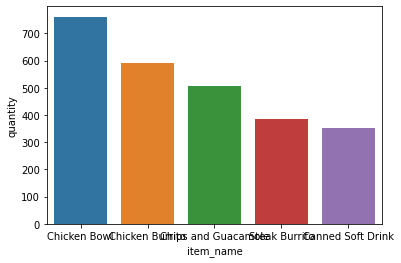

In [70]:
import seaborn as sns

ax = plt.subplots()
ax = sns.barplot(x = 'item_name',y ='quantity',data=top_5)

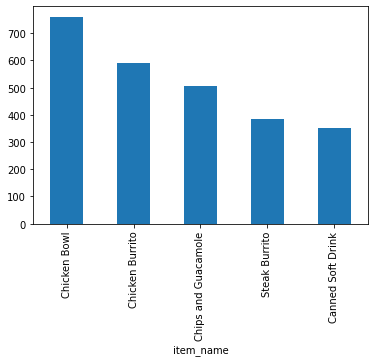

In [63]:
Top_5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[0:5]
Top_5.plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0, 0.5, 'Items')

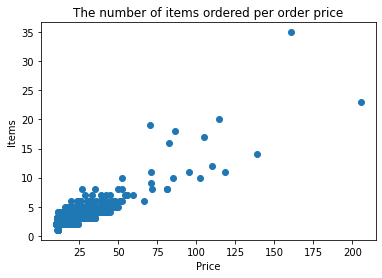

In [19]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
orders = chipo.groupby('order_id').sum()

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(orders['item_price'],orders['quantity'])
axes1.set_title('The number of items ordered per order price')
axes1.set_xlabel('Price')
axes1.set_ylabel('Items')

### Step 7. BONUS: Create a question and a graph to answer your own question.

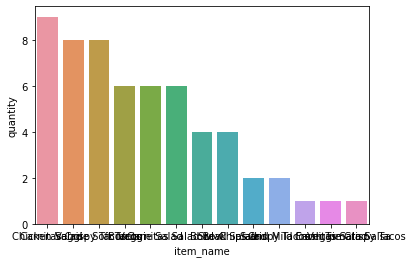

In [87]:
#quantity < 10

chipo_count = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)
chipo_count = pd.DataFrame(chipo_count)
chipo_count.reset_index(inplace=True)

chipo_count['quantity']
chipo_count = chipo_count[chipo_count['quantity'] < 10]

ax = plt.subplots()
ax = sns.barplot(x = 'item_name',y ='quantity',data= chipo_count)